# **Data Preprocessing Tools**
## Machine Learning

<img src="https://upload.wikimedia.org/wikipedia/commons/6/68/LOGO_UEU_BY_ASU-06.png" width=50% height=50%>

<table style="width:75%">
  <tr>
    <td><b>Dosen Pengampu</b></td>
    <td>Jefry Sunupurwa Asri , S.Kom., M.Kom.</td>
   </tr>
  <tr>
    <td><b>Mahasiswa</b></td>
    <td>Andika Noor Ismawan</td>
  </tr>
  <tr>
    <td><b>NIM</b></td>
    <td>20210801465</td>
  </tr>
</table>

<hr>

### Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<hr>

### Importing the dataset

In [3]:
dataset = pd.read_csv('../Pertemuan3/Employee_Data_Company.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
z = dataset.iloc[[2]].values

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EmployeeID   20 non-null     int64  
 1   FirstName    20 non-null     object 
 2   LastName     20 non-null     object 
 3   Email        20 non-null     object 
 4   Department   20 non-null     object 
 5   Title        20 non-null     object 
 6   Salary       16 non-null     float64
 7   JoiningDate  20 non-null     object 
 8   Active       20 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 1.4+ KB


In [5]:
dataset.isnull().sum()

EmployeeID     0
FirstName      0
LastName       0
Email          0
Department     0
Title          0
Salary         4
JoiningDate    0
Active         0
dtype: int64

In [6]:
dataset.isnull().sum().sum()

4

In [7]:
print(z)

[[103 'Michael' 'Johnson' 'michaeljohnson@example.com' 'IT'
  'Software Engineer' nan '2021-01-10' True]]


In [8]:
print(X)

[[101 'John' 'Doe' 'johndoe@example.com' 'HR' 'HR Manager' 60000.0
  '2020-03-15']
 [102 'Jane' 'Smith' 'janesmith@example.com' 'Finance' 'Accountant'
  50000.0 '2019-07-20']
 [103 'Michael' 'Johnson' 'michaeljohnson@example.com' 'IT'
  'Software Engineer' nan '2021-01-10']
 [104 'Emily' 'Williams' 'emilywilliams@example.com' 'Marketing'
  'Marketing Manager' 65000.0 '2018-11-05']
 [105 'David' 'Brown' 'davidbrown@example.com' 'Sales'
  'Sales Representative' 55000.0 '2020-09-30']
 [106 'Lisa' 'Miller' 'lisamiller@example.com' 'HR' 'HR Specialist' nan
  '2019-02-12']
 [107 'Robert' 'Anderson' 'robertanderson@example.com' 'Finance'
  'Financial Analyst' 55000.0 '2020-06-25']
 [108 'Susan' 'Clark' 'susanclark@example.com' 'IT'
  'Database Administrator' 68000.0 '2019-04-08']
 [109 'Matthew' 'White' 'matthewwhite@example.com' 'Marketing'
  'Marketing Coordinator' 48000.0 '2021-03-20']
 [110 'Laura' 'Taylor' 'laurataylor@example.com' 'Sales' 'Sales Manager'
  75000.0 '2018-08-14']
 [111 'J

In [9]:
print(y)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


<hr>

### Taking care of missing data

In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 6:7])
X[:, 6:7] = imputer.transform(X[:, 6:7])

In [11]:
print(X[:, 6])

[60000.0 50000.0 55375.0 65000.0 55000.0 55375.0 55000.0 68000.0 48000.0
 75000.0 42000.0 60000.0 72000.0 52000.0 48000.0 48000.0 42000.0 55375.0
 46000.0 55375.0]


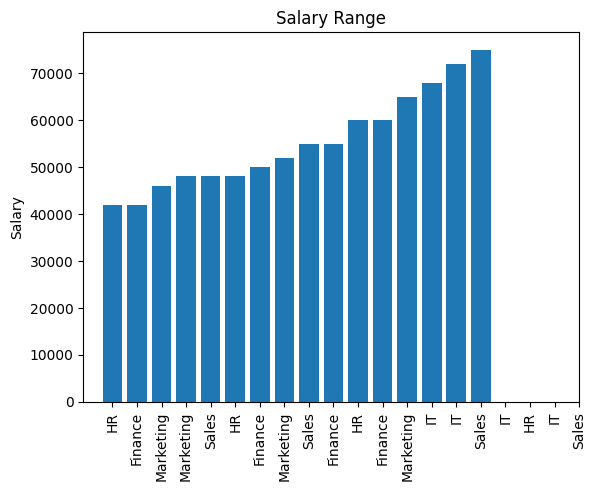

In [14]:
import matplotlib.pyplot as plt
import numpy as np

coloumn_salary = dataset ['Salary']
coloumn_department = dataset ['Department']

df = pd.DataFrame({
    'Department': coloumn_department,
    'Salary': coloumn_salary,
})
df.sort_values(by='Salary', inplace=True)

x_coords = np.arange(len(df))
plt.bar(x_coords, df['Salary'], tick_label=df['Department'])
plt.xticks(rotation=90)
plt.ylabel('Salary')
plt.title('Salary Range')
plt.show()

# Encoding Categorical Data

<hr>

## Encoding the Independent Variable

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X[:, 6])

[0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0
 0.0 1.0]


## Encoding the Dependent Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

[[0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 103 'Michael' 'Johnson'
  'michaeljohnson@example.com' 'IT' 'Software Engineer' '2021-01-10']
 [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 115 'Charles' 'Thomas'
  'charlesthomas@example.com' 'Sales' 'Sales Associate' '2021-06-28']
 [0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 105 'David' 'Brown'
  'davidbrown@example.com' 'Sales' 'Sales Representative' '2020-09-30']
 [0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 118 'Anna' 'Garcia'
  'annagarcia@example.com' 'IT' 'Network Administrator' '2017-10-22']
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 108 'Susan' 'Clark'
  'susanclark@example.com' 'IT' 'Database Administrator' '2019-04-08']
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 102 'Jane' 'Smith'
  'janesmith@example.com' 'Finance' 'Accountant' '2019-07-20']
 [0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 114 'Amy' 'Adams'
  'amyadams@example.com' 'Marketing' 'Marketing Specialist' '2019-09-09']
 [0.0 0.0 0.0 0.

In [ ]:
print(X_test)

[[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 104 'Emily' 'Williams'
  'emilywilliams@example.com' 'Marketing' 'Marketing Manager'
  '2018-11-05']
 [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 117 'George' 'Baker'
  'georgebaker@example.com' 'Finance' 'Junior Accountant' '2018-04-15']
 [0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 107 'Robert' 'Anderson'
  'robertanderson@example.com' 'Finance' 'Financial Analyst' '2020-06-25']
 [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 111 'James' 'Kennedy'
  'jameskennedy@example.com' 'HR' 'HR Assistant' '2022-02-05']]


In [ ]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
print(y_test)

[0 0 0 0]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols_to_scale = [6, 8]
X_train[:, cols_to_scale] = sc.fit_transform(X_train[:, cols_to_scale])
X_test[:, cols_to_scale] = sc.transform(X_test[:, cols_to_scale])
